In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob


## Get timestamps for all units in `cu_exec_start`, `cu_exec_stop`

In [2]:
# Load only the 1 generation strong scaling using heterogeneous protocols (4 ESMACS, 4 TIES)
# rp_folder = glob.glob('../null_continuous_fifo/exp1/rp.*')
# src = rp_folder[0]
# session = ra.Session(stype='radical.pilot', src=src)
# # units = session.filter(etype='unit', uid=units[:3])
# events = session.list('event')

# # Ask Andre about this sorting function

# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid'))[:10])


# data=[]
# stop_data = []
# unit_ids = []

# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data

In [3]:
rp_folder = glob.glob('../null_continuous_fifo/stress-ng-rp-only/correct_stress_ng_no_entk-json/rp.*')
re_folder = glob.glob('../null_continuous_fifo/stress-ng-rp-only/correct_stress_ng_no_entk-json/re.*')

src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)
src = '/Users/JumanaDakka/git/htbac-escience-18/null_continuous_fifo/stress-ng-rp-only/correct_stress_ng_no_entk-json'
# enTK_session = ra.Session(stype='radical.entk', src=src, sid='re.session.two.jdakka.017731.0000')

events = session.list('event')
# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid')))

units = session.filter(etype='unit', uid=['unit.000000','unit.000009',
                                       'unit.000010','unit.000019',
                                       'unit.000020','unit.000029',
                                       'unit.000030','unit.000039',
                                       'unit.000040','unit.000049',
                                       'unit.000050','unit.000059',
                                       'unit.000060','unit.000069',
                                       'unit.000070','unit.000079'], inplace=True)

cu_start_data=[]
cu_stop_data = []
AGENT_SCHEDULING_data = []
FAILED_data = []

units_ids = ['unit.000000','unit.000009',
               'unit.000010','unit.000019',
               'unit.000020','unit.000029',
               'unit.000030','unit.000039',
               'unit.000040','unit.000049',
               'unit.000050','unit.000059',
               'unit.000060','unit.000069',
               'unit.000070','unit.000079']

# events
cu_start_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_start'}])
cu_stop_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}])
cu_start_data = pd.DataFrame(cu_start_data, columns = ['cu_exec_start'], index = units_ids)
cu_stop_data = pd.DataFrame(cu_stop_data, columns = ['cu_exec_stop'], index = units_ids)

# states

Duplicates_AGENT_SCHEDULING_data = units.timestamps(event = [{ru.STATE: rp.AGENT_SCHEDULING}])
AGENT_SCHEDULING_data = [Duplicates_AGENT_SCHEDULING_data[i] for i in range(len(Duplicates_AGENT_SCHEDULING_data)) if i%2==0]
AGENT_SCHEDULING_data = pd.DataFrame(AGENT_SCHEDULING_data, columns = ['AGENT_SCHEDULING'], index = units_ids)

Duplicates_DONE_data = units.timestamps(event = [{ru.STATE: rp.DONE}])
DONE_data = set()
DONE_data = [x for x in Duplicates_DONE_data if x not in DONE_data and (DONE_data.add(x) or True)]
DONE_data = pd.DataFrame(DONE_data, columns = ['DONE'], index = units_ids)

df = pd.concat([cu_start_data, cu_stop_data, AGENT_SCHEDULING_data, DONE_data],  axis=1)
df



# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data



,cu_exec_start,cu_exec_stop,AGENT_SCHEDULING,DONE
unit.000000,2122.4716,2186.5375,2122.3687,2187.9108
unit.000009,2122.9871,2186.8535,2122.3687,2187.9112
unit.000010,2123.0445,2186.9344,2122.3687,2189.2271
unit.000019,2123.6086,2187.5291,2122.3687,2189.2273
unit.000020,2190.3155,2254.0006,2190.1576,2256.3023
unit.000029,2190.7063,2254.4702,2190.1576,2256.3026
unit.000030,2191.4630,2255.1036,2191.2406,2257.6348
unit.000039,2191.8734,2255.4105,2191.2406,2257.6351
unit.000040,2258.1218,2321.8394,2257.9677,2324.6233
unit.000049,2258.2307,2322.3652,2257.9677,2324.6236


### Each subplot presents the data for an EnTK stage (1-4). 


/Users/JumanaDakka/environments/ve_entk_0.7_rp_0.5/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


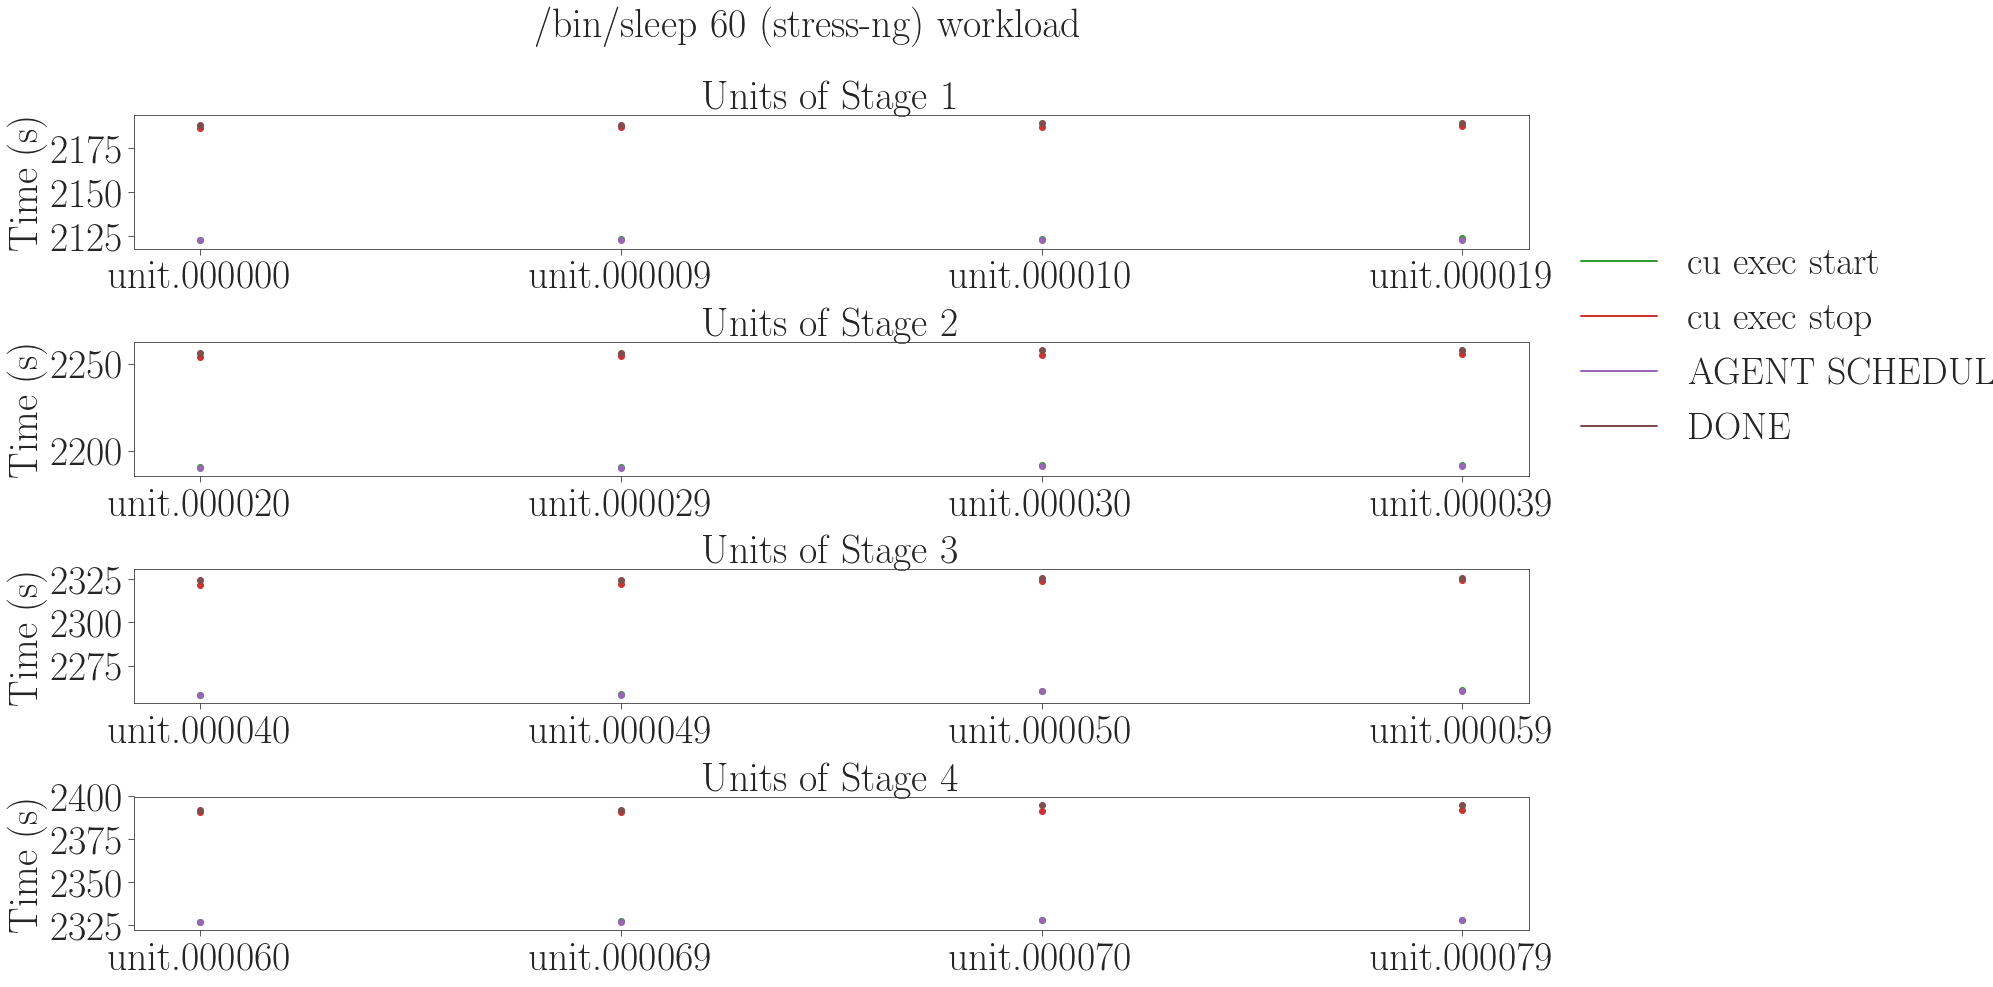

In [4]:
# nunits = concurrent units 
nunits = [1,2,3,4]
fwidth = 32
fhight = 10

fig, axarr = plt.subplots(4, figsize=(25,15))
fig.suptitle('/bin/sleep 60 (stress-ng) workload')
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[0].scatter(df.iloc[0:4]['AGENT_SCHEDULING'].index, df.iloc[0:4]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[0].scatter(df.iloc[0:4]['DONE'].index, df.iloc[0:4]['DONE'],  marker='o', color=tableau20[10])
axarr[0].set_ylabel('Time (s)')
axarr[0].set_title('Units of Stage 1')


axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[1].scatter(df.iloc[4:8]['AGENT_SCHEDULING'].index, df.iloc[4:8]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[1].scatter(df.iloc[4:8]['DONE'].index, df.iloc[4:8]['DONE'],  marker='o', color=tableau20[10])
axarr[1].set_title('Units of Stage 2')
axarr[1].set_ylabel('Time (s)')

axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[2].scatter(df.iloc[8:12]['AGENT_SCHEDULING'].index, df.iloc[8:12]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[2].scatter(df.iloc[8:12]['DONE'].index, df.iloc[8:12]['DONE'],  marker='o', color=tableau20[10])
axarr[2].set_title('Units of Stage 3')
axarr[2].set_ylabel('Time (s)')

axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[3].scatter(df.iloc[12:16]['AGENT_SCHEDULING'].index, df.iloc[12:16]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[3].scatter(df.iloc[12:16]['DONE'].index, df.iloc[12:16]['DONE'],  marker='o', color=tableau20[10])
axarr[3].set_title('Units of Stage 4')
axarr[3].set_ylabel('Time (s)')

fig.subplots_adjust(hspace=0.7)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6]),
                mpl.lines.Line2D([], [], color=tableau20[8]),
                mpl.lines.Line2D([], [], color=tableau20[10])
           ),
           (
                'cu exec start',
                'cu exec stop',
                'AGENT SCHEDULING',
                'DONE'
           ),
            bbox_to_anchor=(.87, .7), loc=2, borderaxespad=0.)


# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('bin_echo_heterogeneous_protocols_CUs.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('bin_echo_heterogeneous_protocols_CUs.png', dpi=300, bbox_inches='tight')
